In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import cv2

ModuleNotFoundError: No module named 'cv2'

# Iteration Plots

In [26]:
def filterdata(gps, embedding, margin=1000):
    positive_gps = []
    positive_embedding = []
    for i in range(len(gps)):
        for j in range(len(gps[i])):
            if gps[i][j] < margin:
                positive_gps.append(gps[i][j])
                positive_embedding.append(abs(1-embedding[i][j]))
    positive_gps = np.array(positive_gps).reshape(-1, 1)
    reg = LinearRegression().fit(positive_gps, positive_embedding)
    return positive_gps, positive_embedding, reg

def plotdata(positive_gps, positive_embedding, reg):
    positive_embedding_pred = reg.predict(positive_gps)    
    plt.scatter(positive_gps, positive_embedding)
    plt.plot(positive_gps, positive_embedding_pred, color='red', linewidth=3)
    plt.show()

## Modified Contrastive Loss

In [27]:
#gps = np.genfromtxt('data/RegressionContrastive/gps.csv', delimiter=',')
#embedding = np.genfromtxt('data/RegressionContrastive/embedding.csv', delimiter=',')
#print(f'No Points: {len(gps)}')
embedding = emb

In [28]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

TypeError: object of type 'numpy.float64' has no len()

In [22]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (-4.580900043992026e-06, 0.19256776992977737)


## Modified Contrastive Loss (Trained on full dataset)

In [10]:
gps = np.genfromtxt('data/FullRegressionContrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/FullRegressionContrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


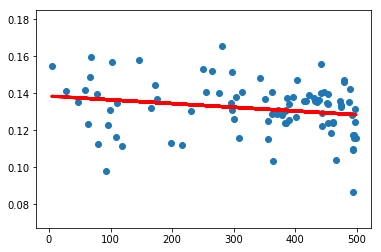

In [11]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [36]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (-9.282388756603972e-07, 0.13277191313796502)


## Contrastive

In [23]:
gps = np.genfromtxt('data/Contrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Contrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


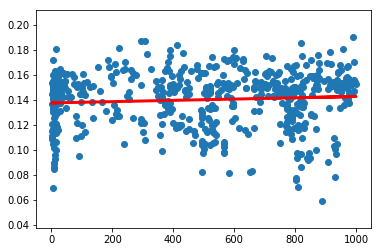

In [24]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [25]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (5.138916892325146e-06, 0.13776178706981995)


## Linear Overweighted Contrastive

In [26]:
gps = np.genfromtxt('data/Overweighted/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Overweighted/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


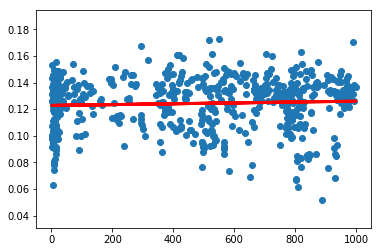

In [27]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

# Iteration Plots

## Positive Point Distribution for different query points

In [267]:
datasets = {1: 'data/IT2/RegressionContrastive', 
            2: 'data/IT2/Contrastive', 
            #3: 'data/IT2/ContinuedContrastive', 
            4: 'data/IT2/OnlyPositiveContrastive',
            5: 'data/IT2/RegContrastiveContinued',
            6: 'data/IT2/CDFTobit/epoch_180',
            7: 'data/IT3/LogTobitAndCDF',
            8: 'data/IT3/LogTobitAndCDF1',
            9: 'data/IT3/RegressionNegNum1',
            10: 'data/IT2/ContrastiveVariantMSE',
            11: 'data/IT3/MSEAndContrastive',
            12: 'data/IT4/MSEAndContrastive/Train',
            13: 'data/IT4/Contrastive/Test',
            14: 'data/IT4/MSEContrativeCombined/Test'}

no = 12
gps = np.genfromtxt(f'{datasets[no]}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/embedding.csv', delimiter=',')
emb = 1-emb

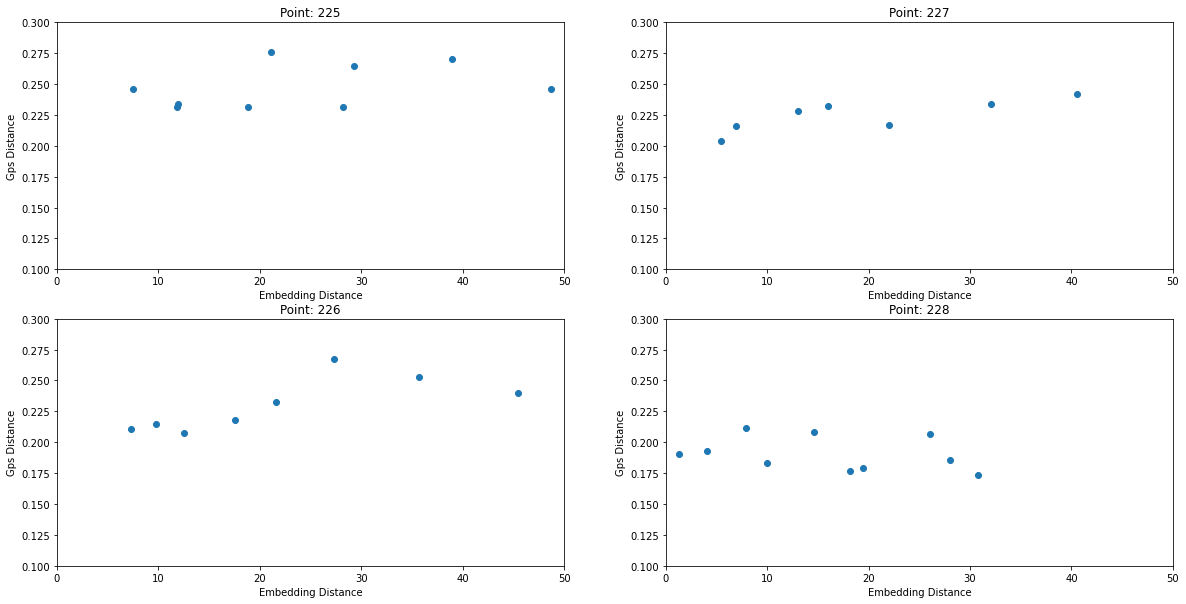

In [271]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

for i in range(4):
    axs[i % 2, i // 2].scatter(gps[seed + i][gps[seed + i] != 0], emb[seed + i][gps[seed + i] != 0]) # Switch axis lims
    #axs[i % 2, i // 2].scatter(emb[seed + i][gps[seed + i] != 0], gps[seed + i][gps[seed + i] != 0])
    axs[i % 2, i // 2].set_ylim([0.10, 0.30])
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_ylabel('Gps Distance')
    axs[i % 2, i // 2].set_xlabel('Embedding Distance')

Notes: 
- Points are very uniformly distributed 
- No correlation 

Text(0.5, 1.0, 'Aggregation of distances')

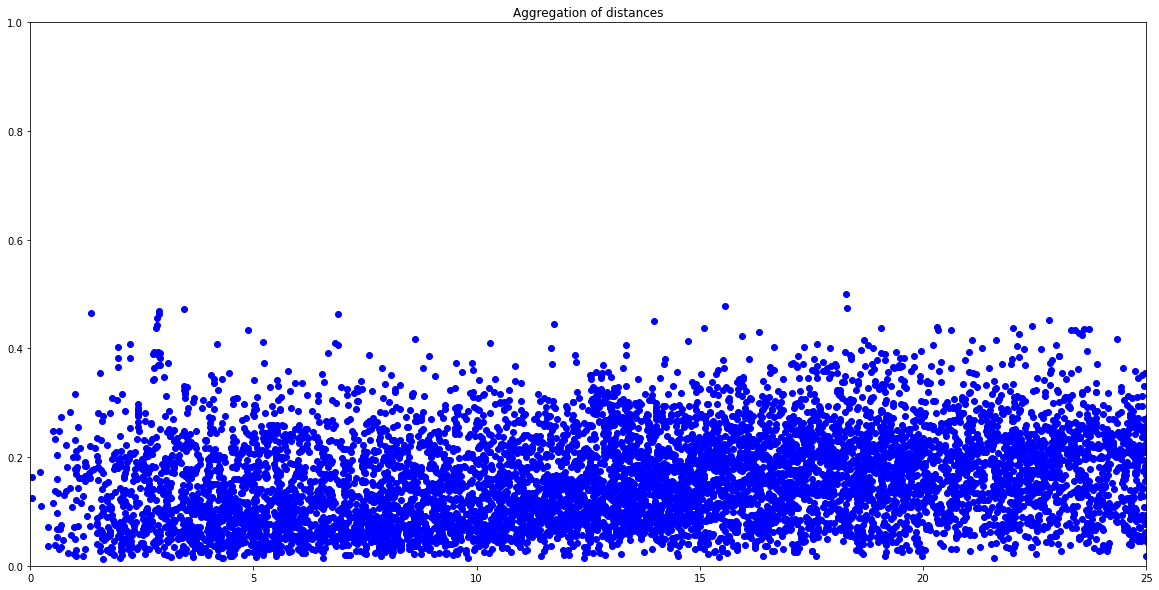

In [61]:
gps = gps.flatten()
emb = emb.flatten()

fig, axs = plt.subplots(1, 1, figsize=(20,10))
axs.scatter(gps[gps != 0], emb[gps != 0], color='b')
axs.set_xlim([0, 25])
axs.set_ylim([0.0, 1.0])
axs.set_title('Aggregation of distances')

## Distance at different Epochs

This section compares the distances to the same points, at different stages during training the network (100, 200 and top epoch). 

- Epoch 100: Recall (1,5,10): [0.41704442 0.54669084 0.5893019 ], mAP 5: 0.281610506698902
- Epoch 200: Recall (1,5,10): [0.43155032 0.57026292 0.62012693], mAP 5: 0.30139291830361636
- Epoch Top: Recall (1,5,10): [0.44696283 0.5793291  0.6337262 ], mAP 5: 0.3122917296262718 

In [10]:
gps100 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_100/gps.csv', delimiter=',')
gps200 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_200/gps.csv', delimiter=',')
gpsbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/gps.csv', delimiter=',')
emb100 = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_100/embedding.csv', delimiter=',')
emb200 = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_200/embedding.csv', delimiter=',')
embbest = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/best/embedding.csv', delimiter=',')

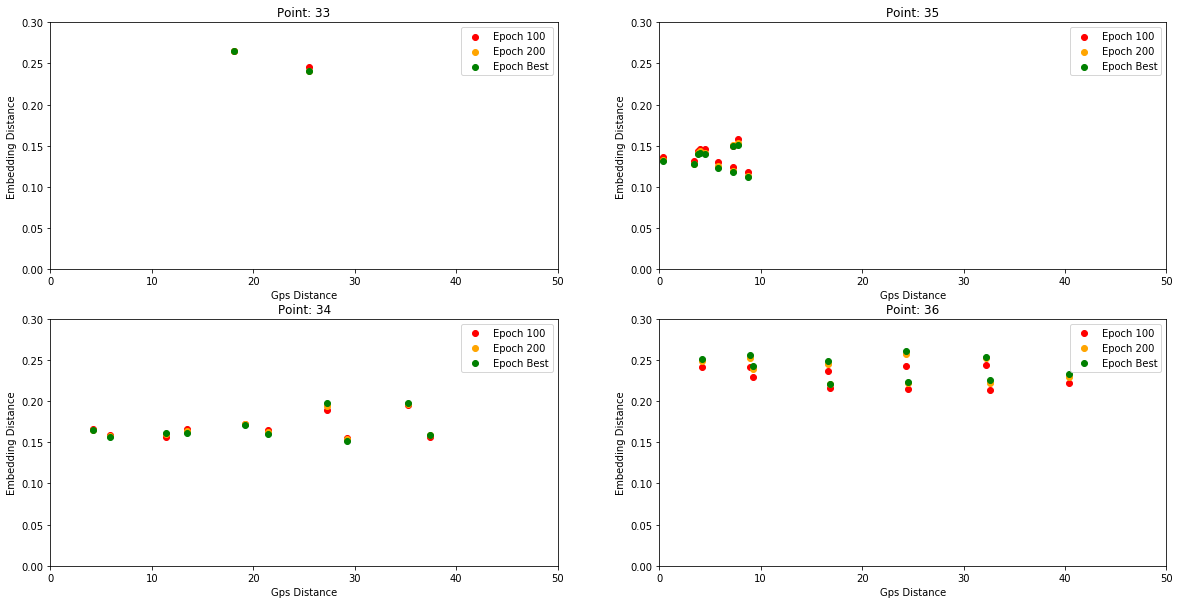

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps100[seed + i][gps100[seed + i] != 0], emb100[seed + i][gps100[seed + i] != 0], color='red', label='Epoch 100')
    axs[i % 2, i // 2].scatter(gps200[seed + i][gps200[seed + i] != 0], emb200[seed + i][gps200[seed + i] != 0], color='orange', label='Epoch 200')
    axs[i % 2, i // 2].scatter(gpsbest[seed + i][gpsbest[seed + i] != 0], embbest[seed + i][gpsbest[seed + i] != 0], color='green', label='Epoch Best')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 0.3])
    axs[i % 2, i // 2].legend()

Notes: 
- Generally, points tend to move away 
- Little to no difference between how positives and negatives are moved

[]

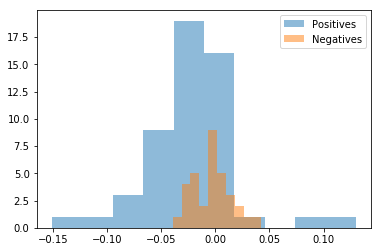

In [125]:
pos_emb_best = np.where(gpsbest <= 25, embbest, embbest*0)
pos_emb_100 = np.where(gps100 <= 25, emb100, emb100*0)

pos_dist = np.zeros(len(emb100))
for i in range(len(emb100)):
    pos_dist[i] = np.sum(pos_emb_best[i] - pos_emb_100[i])

    
neg_emb_best = np.where(gpsbest > 25, embbest, embbest*0)
neg_emb_100 = np.where(gps100 > 25, emb100, emb100*0)

neg_dist = np.zeros(len(emb100))
for i in range(len(emb100)):
    neg_dist[i] = np.sum(neg_emb_best[i] - neg_emb_100[i])
    
plt.hist(pos_dist[pos_dist != 0], alpha=0.5, label='Positives')
plt.hist(neg_dist[neg_dist != 0], alpha=0.5, label='Negatives')
plt.legend()
plt.plot()

In [103]:
pos_mean = pos_dist[pos_dist != 0].mean()
neg_mean = neg_dist[neg_dist != 0].mean()
print('Mean Delta (Positives): {}'.format(pos_mean))
print('Mean Delta (Negatives): {}'.format(neg_mean))

Mean Delta (Positives): -0.021529169036791876
Mean Delta (Negatives): -0.0033454515717246318


## Embedding Distance Histogram

In [126]:
#gpsbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/gps.csv', delimiter=',')
#embbest = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/best/embedding.csv', delimiter=',')

In [14]:
emb_contrastive = 1-np.genfromtxt(f'{datasets[2]}/embedding.csv', delimiter=',')
emb_con_contrastive = 1-np.genfromtxt(f'{datasets[5]}/embedding.csv', delimiter=',')

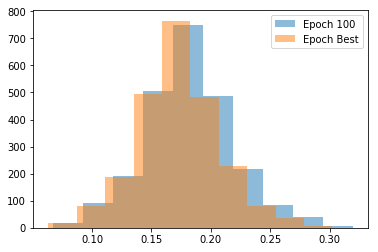

In [15]:
plt.hist(emb_contrastive[emb_contrastive != 1], alpha=0.5, label='Epoch 100')
plt.hist(emb_con_contrastive[emb_con_contrastive != 1], alpha=0.5, label='Epoch Best')
plt.legend()

In [132]:
pos_emb = np.where(gpsbest <= 25, embbest, embbest/embbest)
neg_emb = np.where(gpsbest > 25, embbest, embbest/embbest)

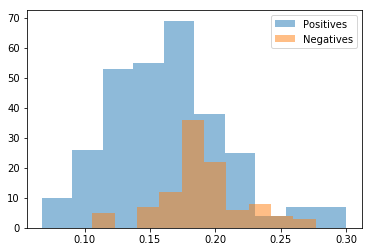

In [133]:
plt.hist(pos_emb[pos_emb != 1], alpha=0.5, label='Positives')
plt.hist(neg_emb[neg_emb != 1], alpha=0.5, label='Negatives')
plt.legend()

## CDF Tobit At Different Stages 

In [20]:
gps20 = np.genfromtxt('data/IT2/CDFTobit/epoch_20/gps.csv', delimiter=',')
gps180 = np.genfromtxt('data/IT2/CDFTobit/epoch_180/gps.csv', delimiter=',')
emb20 = 1-np.genfromtxt('data/IT2/CDFTobit/epoch_20/embedding.csv', delimiter=',')
emb180 = 1-np.genfromtxt('data/IT2/CDFTobit/epoch_180/embedding.csv', delimiter=',')

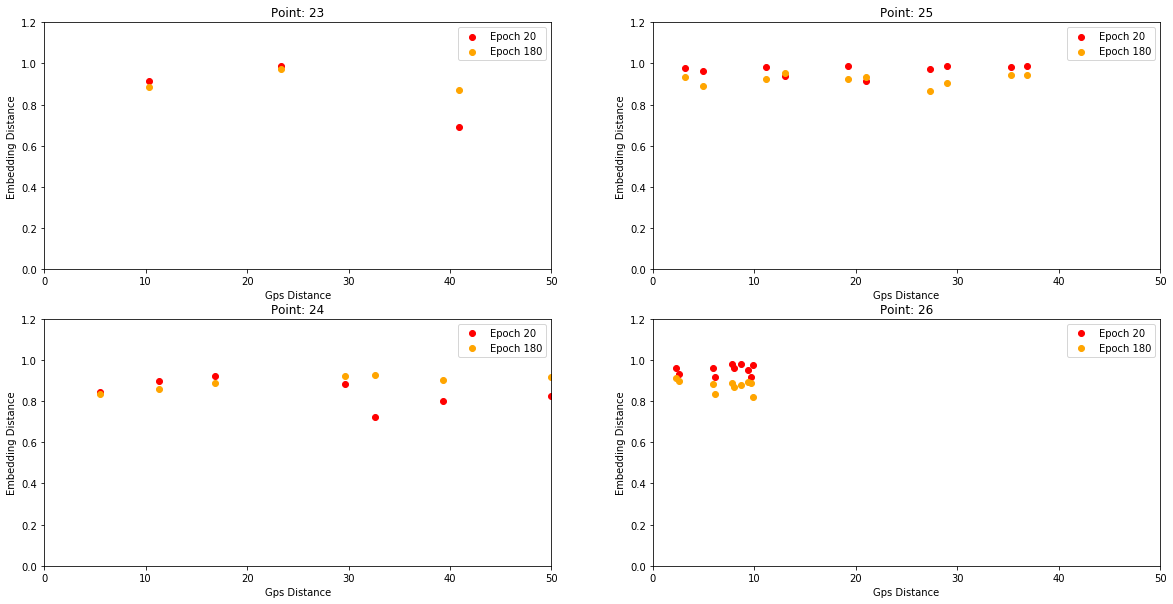

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps20[seed + i][gps20[seed + i] != 0], emb20[seed + i][emb20[seed + i] != 1], color='red', label='Epoch 20')
    axs[i % 2, i // 2].scatter(gps180[seed + i][gps180[seed + i] != 0], emb180[seed + i][emb180[seed + i] != 1], color='orange', label='Epoch 180')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 1.2])
    axs[i % 2, i // 2].legend()

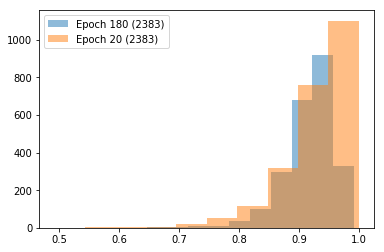

In [37]:
plt.hist(emb180[emb180 != 1], alpha=0.5, label=f'Epoch 180 ({len(emb180[emb180 != 1])})')
plt.hist(emb20[emb20 != 1], alpha=0.5, label=f'Epoch 20 ({len(emb20[emb20 != 1])})')

plt.legend()

In [25]:
print(len(emb180[emb180 != 1]), len(emb20[emb20 != 1]))

2383 2383


## Contrastive Continued with Modified Contrastive

In [38]:
gps = np.genfromtxt(f'{datasets[2]}/gps.csv', delimiter=',')
emb = 1 - np.genfromtxt(f'{datasets[2]}/embedding.csv', delimiter=',')

gps_c = np.genfromtxt(f'{datasets[4]}/gps.csv', delimiter=',')
emb_c = 1 - np.genfromtxt(f'{datasets[4]}/embedding.csv', delimiter=',')

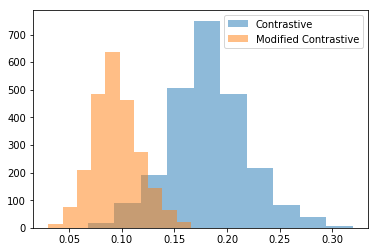

In [40]:
plt.hist(emb[emb != 1], alpha=0.5, label='Contrastive')
plt.hist(emb_c[emb_c != 1], alpha=0.5, label='Modified Contrastive')
plt.legend()

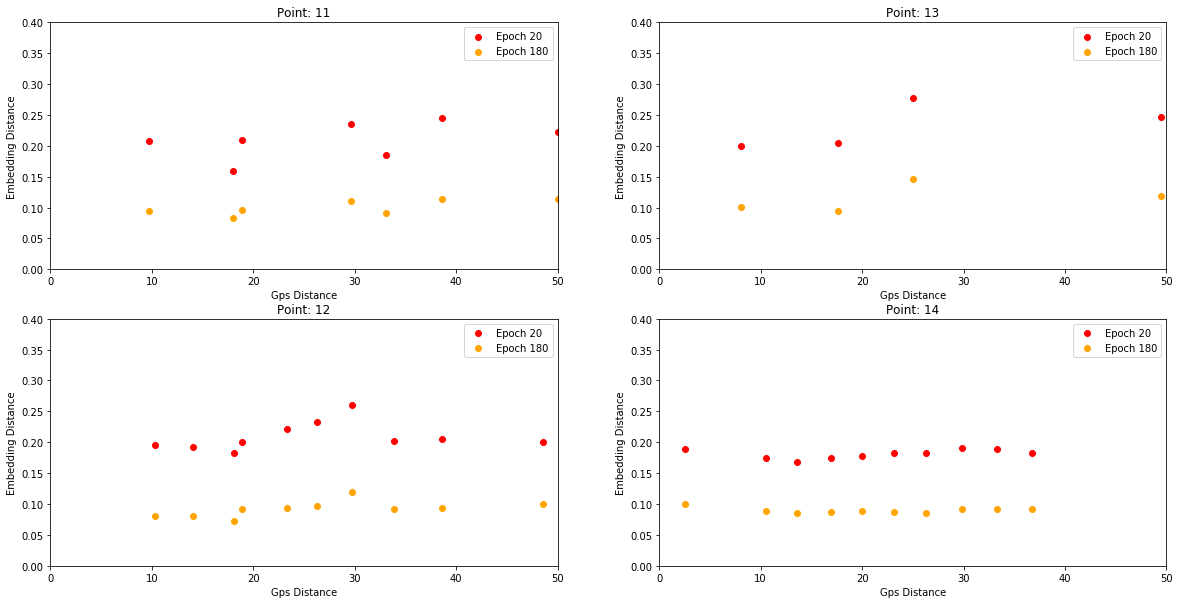

In [146]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps[seed + i][gps[seed + i] != 0], emb[seed + i][emb[seed + i] != 1], color='red', label='Epoch 20')
    axs[i % 2, i // 2].scatter(gps_c[seed + i][gps_c[seed + i] != 0], emb_c[seed + i][emb_c[seed + i] != 1], color='orange', label='Epoch 180')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 0.4])
    axs[i % 2, i // 2].legend()

# Iteration 3 Plots

In [5]:
datasets = {7: 'data/IT3/LogTobitAndCDF',
            8: 'data/IT3/RegressionNegNum1',
            9: 'data/IT3/AllAnglesTest'}

no = 10
gps = np.genfromtxt(f'{datasets[no]}/gps.csv', delimiter=',')
angles = np.genfromtxt(f'{datasets[no]}/angles.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/embedding.csv', delimiter=',')
emb = 1-emb

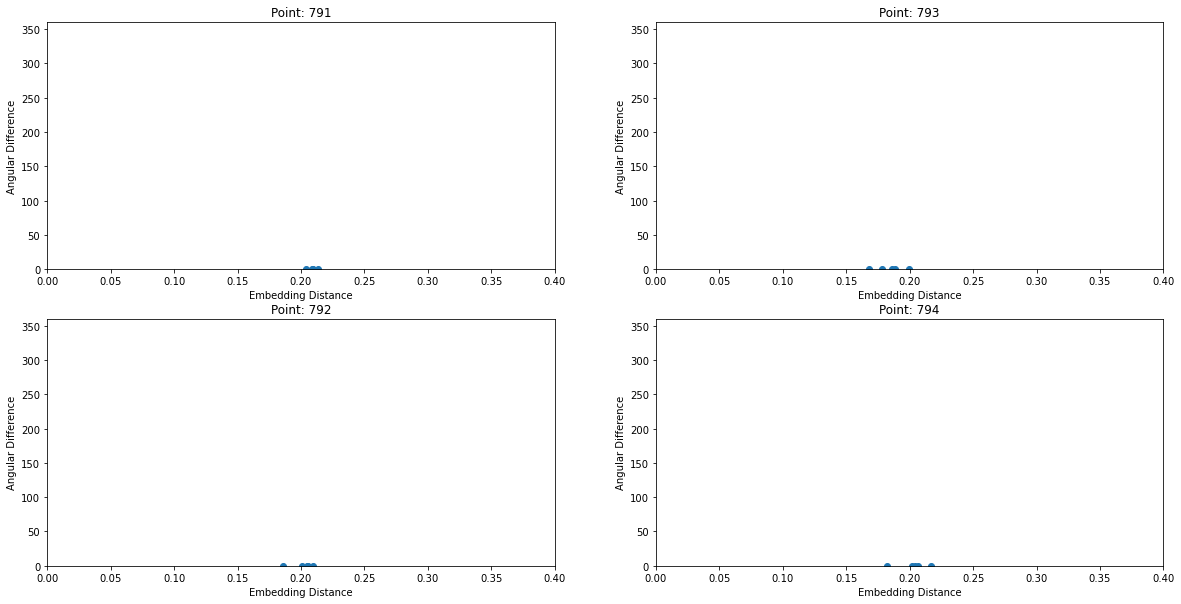

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

for i in range(4):
    axs[i % 2, i // 2].scatter(emb[seed + i][gps[seed + i] != 0], angles[seed + i][gps[seed + i] != 0])
    axs[i % 2, i // 2].set_xlim([0.0, 0.40])
    axs[i % 2, i // 2].set_ylim([0, 360])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Embedding Distance')
    axs[i % 2, i // 2].set_ylabel('Angular Difference')

In [14]:
angle_range = []
for i in range(len(gps)):
    a = angles[i][gps[i] != 0]
    angle_range.append(max(a) - min(a))


In [6]:
print(np.array(angle_range).mean())
print(np.median(np.array(angle_range)))

43.50831003199419
14.455718994140675


# TEST

In [493]:
datasets = {#1: 'data/IT2/RegressionContrastive', 
            #2: 'data/IT2/Contrastive', 
            #3: 'data/IT2/ContinuedContrastive', 
            #4: 'data/IT2/OnlyPositiveContrastive',
            #5: 'data/IT2/RegContrastiveContinued',
            #6: 'data/IT2/CDFTobit/epoch_180',
            #7: 'data/IT3/LogTobitAndCDF',
            #8: 'data/IT3/LogTobitAndCDF1',
            #9: 'data/IT3/RegressionNegNum1',
            10: 'data/IT2/ContrastiveVariantMSE',
            11: 'data/IT3/MSEAndContrastive',
            12: 'data/IT4/MSEAndContrastive',
            13: 'data/IT4/Contrastive',
            14: 'data/IT4/MSEContrativeCombined'}

NO = 12
MODE = 'Train'
#MODE = 'Test'


gps = np.genfromtxt(f'{datasets[no]}/{MODE}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/{MODE}/embedding.csv', delimiter=',')
emb = 1-emb

# filter away negatives
for i in range(len(gps)):
    gps[i][gps[i] > 25] = 0
    emb[i][gps[i] > 25] = 1

In [498]:
def linear_regression_predict(gps, emb):
    reshaped_gps = gps.reshape(-1, 1)
    reshaped_emb = emb.reshape(-1, 1)
    reg = LinearRegression().fit(reshaped_gps, reshaped_emb)
    print(reg.coef_[0])
    return reg, reg.predict(reshaped_gps)

[-0.04557511]
[0.05362181]
[0.01008468]
[-0.07112365]


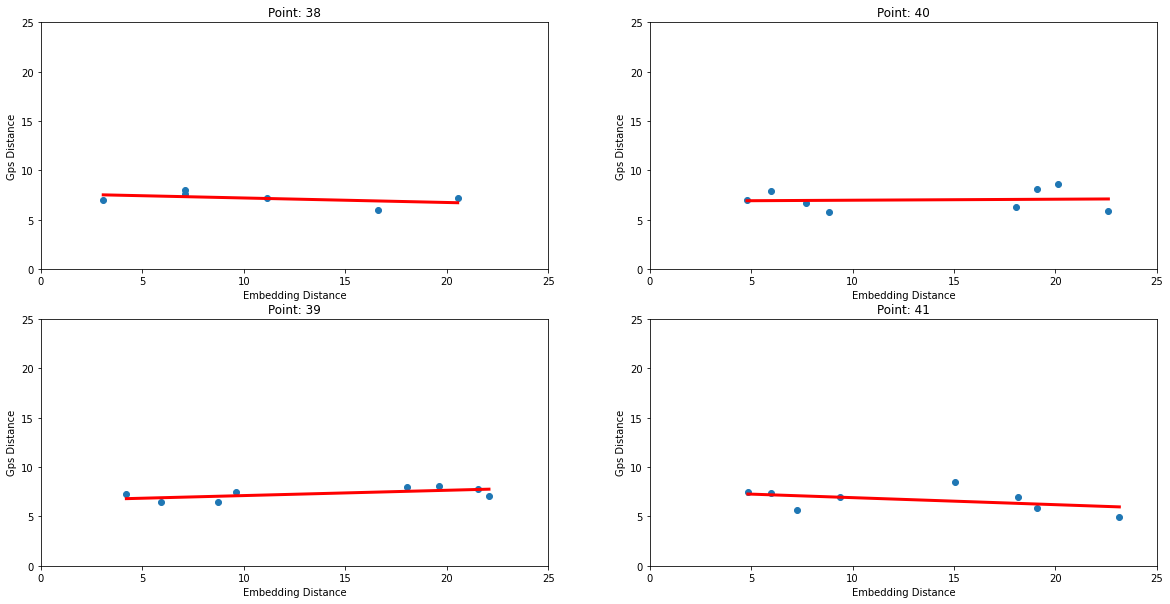

In [503]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

for i in range(4):
    filtered_emb = emb[seed + i][gps[seed + i] != 0]
    filtered_gps = gps[seed + i][gps[seed + i] != 0]
    filtered_emb *= 35

    _, predicted = linear_regression_predict(filtered_gps, filtered_emb)
    
    axs[i % 2, i // 2].scatter(filtered_gps, filtered_emb) # Switch axis lims
    #axs[i % 2, i // 2].scatter(emb[seed + i][gps[seed + i] != 0], gps[seed + i][gps[seed + i] != 0])
    axs[i % 2, i // 2].plot(filtered_gps, predicted, color='red', linewidth=3)
    #axs[i % 2, i // 2].set_ylim([0.00, 0.60])
    axs[i % 2, i // 2].set_xlim([0, 25])
    axs[i % 2, i // 2].set_ylim([0, 25])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_ylabel('Gps Distance')
    axs[i % 2, i // 2].set_xlabel('Embedding Distance')


In [480]:
coefficients2 = []
for i in range(len(gps)):
    filtered_gps = gps[i][gps[i] != 0]
    filtered_emb = emb[i][gps[i] != 0]
    reg, _ = linear_regression_predict(filtered_gps, filtered_emb)
    coefficients2.append(reg.coef_[0][0])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2., 41.,  6.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.]),
 array([-0.05      , -0.04473684, -0.03947368, -0.03421053, -0.02894737,
        -0.02368421, -0.01842105, -0.01315789, -0.00789474, -0.00263158,
         0.00263158,  0.00789474,  0.01315789,  0.01842105,  0.02368421,
         0.02894737,  0.03421053,  0.03947368,  0.04473684,  0.05      ]),
 <BarContainer object of 19 artists>)

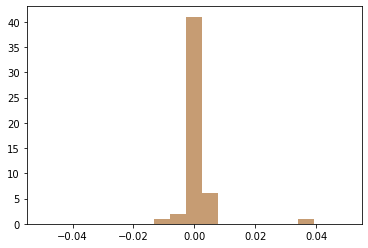

In [457]:
bins_list = np.linspace(-0.05, 0.05, num=20)
plt.hist(coefficients2, alpha=0.5, label='Epoch 100', bins=bins_list)
plt.hist(coefficients, alpha=0.5, label='Epoch 100', bins=bins_list)